In [ ]:
import os
import cv2
import numpy as np



dataset_path = "/home/basma/Plant_Disease/dataset_tomato/"
IMG_SIZE = 128

data = []
labels = []



classes = os.listdir(dataset_path)
classes.sort()

for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0

        data.append(img)
        labels.append(i)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
# print(labels[:999])

print("Number of classes:", len(classes))
print("Classes:", classes)

# print(np.unique(labels))






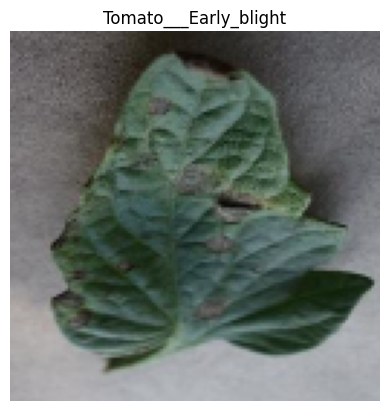

In [ ]:

# to test if the img are 128x128 and if all classes are loaded from 0 to 4

# import matplotlib.pyplot as plt
# index = 4
# plt.imshow(data[index])
# plt.title(classes[labels[index]])
# plt.axis("off")
# plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data, labels = shuffle(data, labels, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (5056, 128, 128, 3) (5056,)
Validation: (1083, 128, 128, 3) (1083,)
Test: (1084, 128, 128, 3) (1084,)


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



2026-02-02 19:50:15.912313: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-02 19:50:15.934988: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-02 19:50:16.696414: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-02 19:50:19.687866: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       635,045 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,941 (2.43 MB)

 Trainable params: 635,941 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

num_classes = len(classes)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/home/basma/Plant_Disease/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)

Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - accuracy: 0.5734 - loss: 1.1099 - val_accuracy: 0.7701 - val_loss: 0.6400
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 30s 188ms/step - accuracy: 0.8214 - loss: 0.4788 - val_accuracy: 0.8356 - val_loss: 0.4870
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.8904 - loss: 0.3017 - val_accuracy: 0.8633 - val_loss: 0.4265
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.9369 - loss: 0.1874 - val_accuracy: 0.8495 - val_loss: 0.4905
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.9545 - loss: 0.1383 - val_accuracy: 0.8283 - val_loss: 0.6281
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.9646 - loss: 0.1040 - val_accuracy: 0.8578 - val_loss: 0.5490
Epoch 7/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.9769 - loss: 0.0754 - val_accuracy: 0.8947 - val_loss: 0.4550
Epoch 8/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 30s 190ms/step - accuracy: 0.9826 - loss: 0

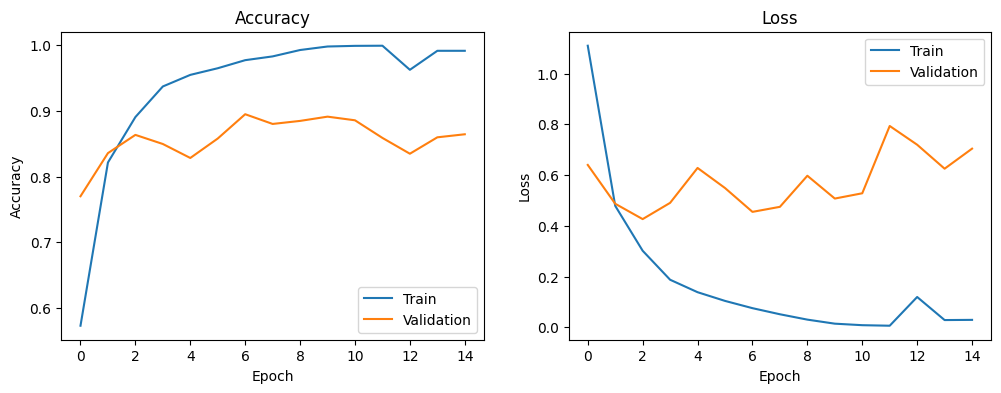

In [11]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8810 - loss: 0.5041
Test accuracy: 0.8809962868690491


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


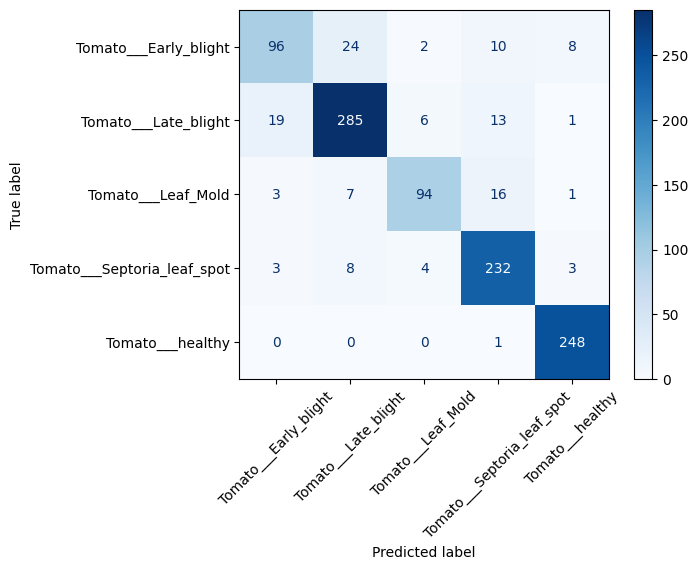

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


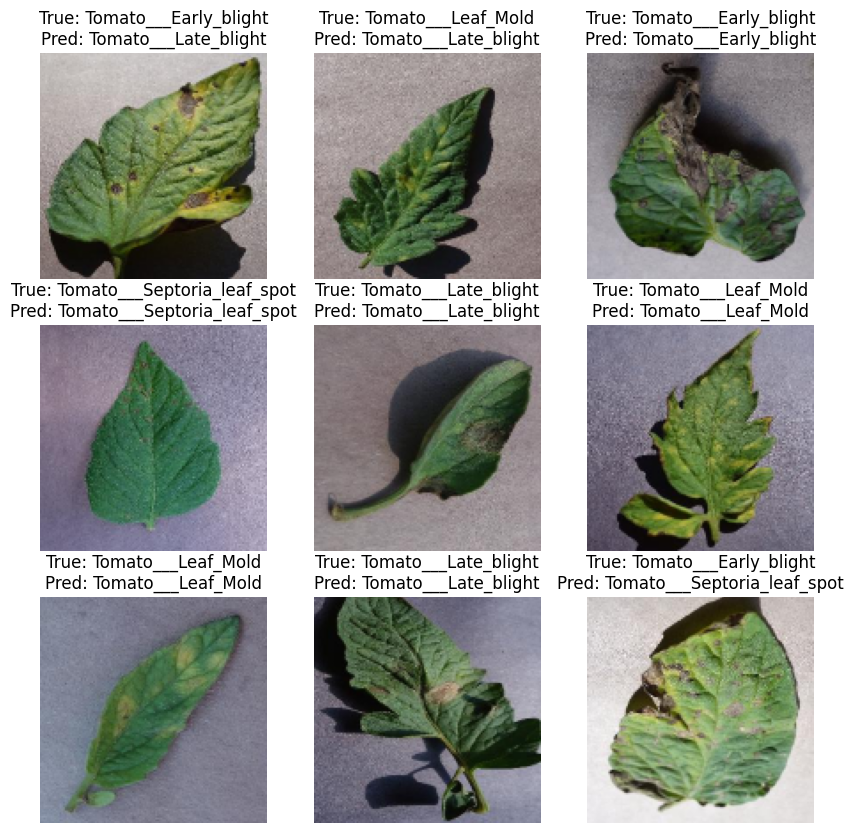

In [14]:
import random

plt.figure(figsize=(10, 10))

for i in range(9):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]
    true_label = classes[y_test[idx]]
    pred_label = classes[y_pred_classes[idx]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.show()

In [21]:
from tensorflow.keras.preprocessing import image

img_path = r"/home/basma/Plant_Disease/sephtoria.jpeg"

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = classes[np.argmax(prediction)]

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: Tomato___Septoria_leaf_spot
